# やること

# 関数作成
## (X,t)を作る。
## $\phi_0,...,\phi_{M-1}$を作る。
e.g. $\phi_0(x)=1, \phi_1(x)=x, \phi_2(x)=x^2,\ldots$
## $\Phi$を計算する
## $\omega$を計算する

# Cross-Validation

## (X,t)をK分割する。
## それぞれの分割kについて以下をやる。
    ### k番目以外を使って関数を作る。
    ### k番目を使って
1. $(x,t)$ をプロット
2. $(x,\omega \phi(x))$をプロット
3.2乗誤差 $|\omega \phi(x)-t|^2$とRMS(Root mean squre) $\sqrt{ \sum_n |\omega \phi(x_n)-t_n|^2 /N_k}$を計算して評価.

In [1]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [23]:
xy_min = -1
xy_max = 1
n_division = 10

x = np.linspace(xy_min, xy_max, n_division+1)

X=np.meshgrid(x,x)
t=np.sin(X[0])+3*np.cos(X[1])+X[0]*X[1]

num_data=X[0].size
#データ点の個数

#Ｘは(n_division+1)^2個の点の集まり。
#X[0]はx座標の集まり. X[1]はy座標の集まり。

standard_deviation = .1
mean = .0
normal_random_generator = np.random.normal
#正規分布にしたがうランダムノイズを生成する。最小二乗法の前提：誤差は正規分布

t_noised=t+ normal_random_generator(mean, standard_deviation,X[0].shape)

11


In [3]:
#(i.j)のところの点の座標は以下
i=5
j=2
X[0][i][j],X[1][i][j]

(-0.59999999999999998, 0.0)

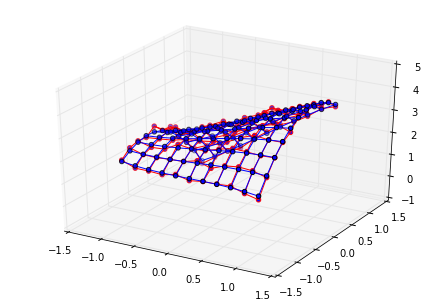

In [4]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X[0],X[1],t) #<---ここでplot
ax.scatter(X[0],X[1],t) #<---ここでplot

ax.scatter(X[0],X[1],t_noised,color='red') #<---ここでplot
ax.plot_wireframe(X[0],X[1],t_noised,color='red') #<---ここでplot

In [5]:
x_array=np.reshape(X[0],np.size(X[0]))
y_array=np.reshape(X[1],np.size(X[1]))
t_array=np.reshape(t,np.size(t))

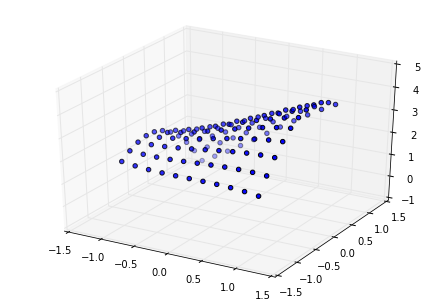

In [6]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_array,y_array,t_array) #<---ここでplot

In [48]:
phi_00 =lambda a,b : np.ones(a.shape)
phi_10 =lambda a,b : a
phi_01 =lambda a,b : b
phi_20 =lambda a,b : a**2
phi_11 =lambda a,b : a*b
phi_02 =lambda a,b : b**2
#lambda(無名関数)で基底関数を作る

In [49]:
phi = [phi_00, phi_10,phi_01,phi_20,phi_11,phi_02]
#基底関数の組み合わせ

num_func=len(phi)
#基底関数の個数

In [71]:
PHI = np.zeros((num_data, num_func))

In [72]:
np.reshape(phi_00(X[0],X[1]),X[0].size)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [75]:
for i,ph in enumerate(phi):
    PHI[:,i] = np.reshape(ph(X[0],X[1]),X[0].size)
#関数Φ（サンプル数×基底関数の個数）の各要素に値を入れる

In [76]:
PHI

array([[ 1.  , -1.  , -1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  , -0.8 , -1.  ,  0.64,  0.8 ,  1.  ],
       [ 1.  , -0.6 , -1.  ,  0.36,  0.6 ,  1.  ],
       [ 1.  , -0.4 , -1.  ,  0.16,  0.4 ,  1.  ],
       [ 1.  , -0.2 , -1.  ,  0.04,  0.2 ,  1.  ],
       [ 1.  ,  0.  , -1.  ,  0.  , -0.  ,  1.  ],
       [ 1.  ,  0.2 , -1.  ,  0.04, -0.2 ,  1.  ],
       [ 1.  ,  0.4 , -1.  ,  0.16, -0.4 ,  1.  ],
       [ 1.  ,  0.6 , -1.  ,  0.36, -0.6 ,  1.  ],
       [ 1.  ,  0.8 , -1.  ,  0.64, -0.8 ,  1.  ],
       [ 1.  ,  1.  , -1.  ,  1.  , -1.  ,  1.  ],
       [ 1.  , -1.  , -0.8 ,  1.  ,  0.8 ,  0.64],
       [ 1.  , -0.8 , -0.8 ,  0.64,  0.64,  0.64],
       [ 1.  , -0.6 , -0.8 ,  0.36,  0.48,  0.64],
       [ 1.  , -0.4 , -0.8 ,  0.16,  0.32,  0.64],
       [ 1.  , -0.2 , -0.8 ,  0.04,  0.16,  0.64],
       [ 1.  ,  0.  , -0.8 ,  0.  , -0.  ,  0.64],
       [ 1.  ,  0.2 , -0.8 ,  0.04, -0.16,  0.64],
       [ 1.  ,  0.4 , -0.8 ,  0.16, -0.32,  0.64],
       [ 1.  ,  0.6 , -0.8 ,  0

In [9]:
p=(3,4)
phi_p=[0]*len(phi)
for i, ph in enumerate (phi):
    phi_p[i]=ph(*p)
#enumerate：インデックスとともにループ

In [10]:
phi_p

[1, 3, 4, 9, 12, 16]

In [11]:
tuple(p)

(3, 4)

In [12]:
some_list=[0]*5

In [13]:
some_list

[0, 0, 0, 0, 0]

array([ 0.,  0.,  0.])